# COVID-19 Analysis
Data Source: https://github.com/nytimes/covid-19-data/pulse

In [135]:
#Load all the libraries!
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [155]:
#Reading in dataset and selecting data.
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", parse_dates=['date'])
states = ["New York", "Washington", "California", "West Virginia", "Georgia"]
df = df[df["state"].isin(states)]


In [156]:
#Displaying first 5 rows
df.head(-5)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
...,...,...,...,...,...
2726,2020-04-21,California,6,35844,1316
2732,2020-04-21,Georgia,13,19189,810
2755,2020-04-21,New York,36,251720,14828
2773,2020-04-21,Washington,53,12345,683


In [157]:
#Restructuring the data
df = df.pivot(index='date', columns='state', values ='cases')
states = list(df.columns)
covid = df.reset_index('date')
covid.set_index(['date'], inplace = True)
covid.columns = states

#Calculating Rates per 1000 (Generate a number of cases per 1000 people)
populations = {"New York":19491339, "Washington":7797095, "California":	39937489, "West Virginia":1778070, "Georgia":10736059}
percapita = covid.copy()
for state in list(percapita.columns):
    percapita[state] = percapita[state]/populations[state]*1000

In [158]:
#Generate colors and style for the visualization.
colors = {"New York": "#001D55", "Washington": "#FF001E", "California":"#17B343", "West Virginia": "#EA8C17", "Georgia": "#723772"}
plt.style.use('fivethirtyeight')

Text(2020-01-22 00:00:00, -100000, 'careem-19             Source: https://github.com/nytimes/covid-19-data/blob/master/us-states.csv')

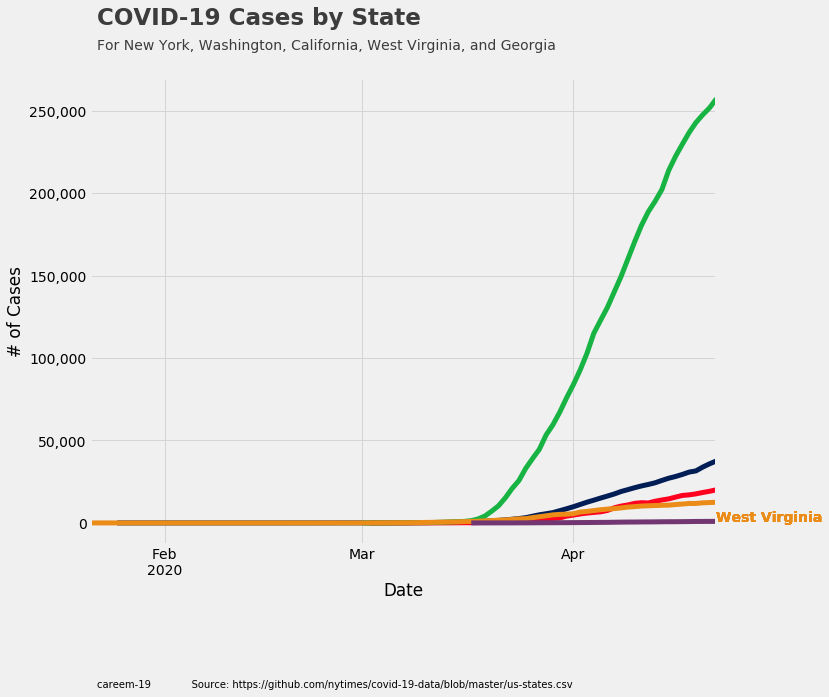

In [159]:
#Creating the visualization of cases over time.
plot = covid.plot(figsize=(10,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#D4D4D4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

#Assigning color.
for country in list(colors.keys()):
    plot.text(x=covid.index[-1], y = covid[state].max(), color = colors[state], s = state, weight="bold")

#Adding labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by State", fontsize=23, weight='bold', alpha=.75)
plot.text(x = covid.index[1], y = int(covid.max().max())+30000, s = "For New York, Washington, California, West Virginia, and Georgia", fontsize=14, alpha=.75)
plot.text(x = percapita.index[1], y = -100000, s = 'careem-19             Source: https://github.com/nytimes/covid-19-data/blob/master/us-states.csv', fontsize = 10)
